<table style="width:100%">
  <tr>
    <th> <img src=".\..\img\logo_EPM_UNIOVI_CabeceroWEB.gif" alt="Uniovi & EP Mieres logos" title="Uniovi & EP Mieres logos" /></th>
    <th><font color=brown>Procesamiento de imágenes de Sensores Aerotransportados y Satélite</font>
         </font></th> 
    <th><font color=green>Universidad de Oviedo.                      Ingeniería en Geomática</font>         sgcortes@uniovi.es</th>
  </tr>
</table>

## Ecualización del histograma
En este caso se busca la modificación del histograma de la imagen para hacerlo semejante al de una distribución uniforme. Aunque la igualdad exacta no se consiga, nos acercaremos con aproximaciones al histograma equiprobable (horizontal) es decir al cdf representado por la línea de 45º de pendiente.

(673, 622)
ND Máximo=  0.6475165941863127
ND Mínimo=  0.06283665217059586


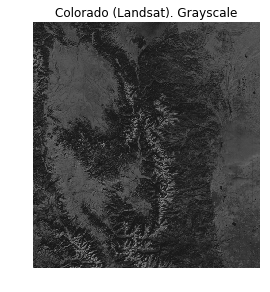

In [40]:
import skimage
from skimage import exposure, data, img_as_float, io
import numpy as np
import matplotlib.pyplot as plt
colo = io.imread('B8_colorado.tif')
colo = img_as_float(colo)
print(colo.shape)
io.imshow(colo)
plt.title('Colorado (Landsat). Grayscale')
plt.axis('off')
# Valores máximos y mínimos de la imagen
print('ND Máximo= ', colo.max())
print('ND Mínimo= ', colo.min())

(0, 1)

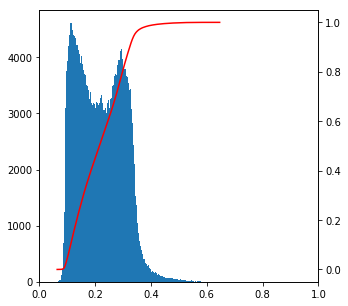

In [41]:
# Histograma
fig2 = plt.figure(figsize=(5,5)) # controla el tamaño de la figura y los ejes
m = plt.hist(colo.ravel(),bins=256)
img_cdf, bins = skimage.exposure.cumulative_distribution(colo, 256)
ax_cdf = plt.twinx()
ax_cdf.plot(bins,img_cdf, color='red')
ax_cdf.set_xlim(0,1)

ND Mínimo=  4.7777623827656555e-06
ND Máximo=  1.0


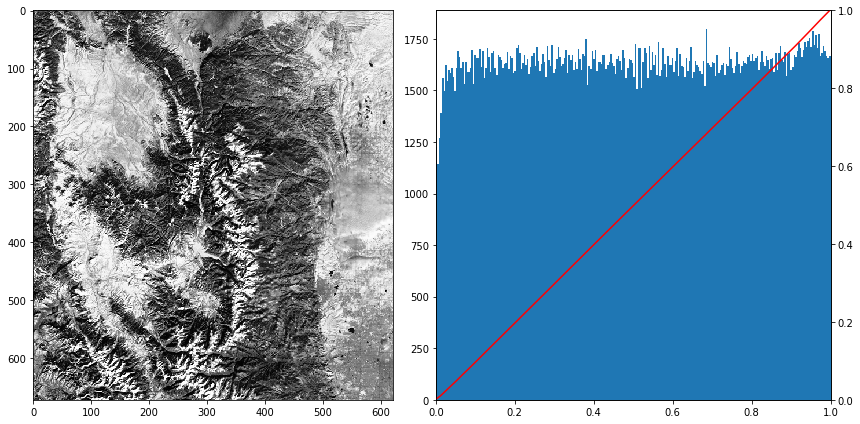

In [42]:
fig3=plt.figure(figsize=(12,6))
colo_equal = exposure.equalize_hist(colo)
plt.subplot(1,2,1)
io.imshow(colo_equal)
plt.subplot(1,2,2)
m_rescaled = plt.hist(colo_equal.ravel(),bins=256)
img_cdf, bins = skimage.exposure.cumulative_distribution(colo_equal, 256)
ax_cdf = plt.twinx()
ax_cdf.plot(bins,img_cdf, color='red')
ax_cdf.set_xlim(0,1)
ax_cdf.set_ylim(0,1)
plt.tight_layout()

# Valores máximos y mínimos de la imagen equalizdda())
print('ND Mínimo= ', colo_equal.min())
print('ND Máximo= ', colo_equal.max())

### Ecualización adaptativa o local del histograma
En este caso en lugar de buscar una transformación global única para toda la imagen se plantean transformaciones locales para cregiones de menor tamaño en las que se equaliza el "sub-histograma" de cada una de esas regiones. Esto consigue mantener mas detalles en zonas en las que por exceso de rango dinámico entre áreas vecinas sería difícil de lograrlo con una sola transformación.

C:\Users\Usuario\Anaconda3\envs\opencv\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


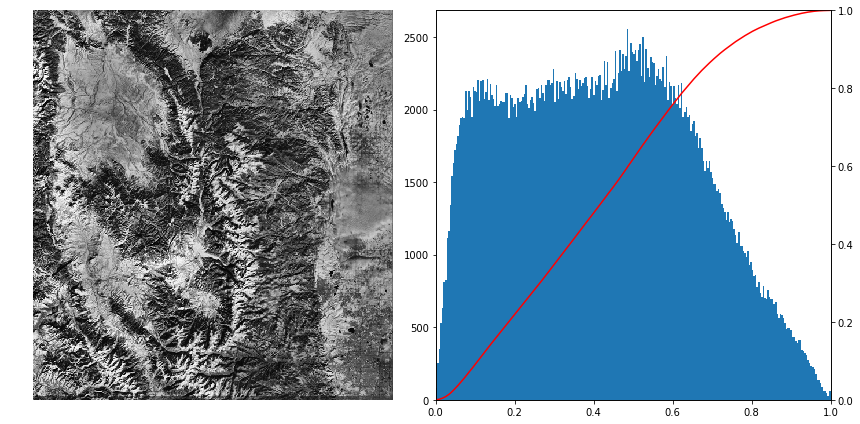

In [43]:
fig4=plt.figure(figsize=(12,6))
colo_equal_adapt = exposure.equalize_adapthist(colo)
plt.subplot(121)
io.imshow(colo_equal_adapt, cmap='gray')
plt.axis('off')
plt.subplot(122)
m_clipped = plt.hist(colo_equal_adapt.ravel(),bins=256)
img_cdf, bins = skimage.exposure.cumulative_distribution(colo_equal_adapt, 256)
ax_cdf = plt.twinx()
ax_cdf.plot(bins,img_cdf, color='red')
ax_cdf.set_xlim(0,1)
ax_cdf.set_ylim(0,1)
plt.tight_layout()


Frente a la imagen anterior se mantienen los detalels en todos los todos bajos, medios y altos.